# 1.Loading the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.feature_selection import chi2, f_regression, SelectKBest
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, mean_absolute_error, classification_report
from sklearn import preprocessing, svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import drive

import warnings
warnings.filterwarnings('ignore')



In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# 2. Loading Our Dataset

Dataset Source : https://www.kaggle.com/datasets/zagarsuren/telecom-churn-dataset-ibm-watson-analytics

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Thinkful - Datascience/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 3.Data Exploration and Clean up

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.shape

(7043, 21)

In [ ]:
# Drop customerID column as they are unique and not need for classication
df = df.drop('customerID', axis=1)

In [ ]:
# Check columns unique values
df_col =df[0:0]
for i in df_col:
    print(i+ " : ")
    print(df[i].unique(), "\n")

gender : 
['Female' 'Male'] 

SeniorCitizen : 
[0 1] 

Partner : 
['Yes' 'No'] 

Dependents : 
['No' 'Yes'] 

tenure : 
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

PhoneService : 
['No' 'Yes'] 

MultipleLines : 
['No phone service' 'No' 'Yes'] 

InternetService : 
['DSL' 'Fiber optic' 'No'] 

OnlineSecurity : 
['No' 'Yes' 'No internet service'] 

OnlineBackup : 
['Yes' 'No' 'No internet service'] 

DeviceProtection : 
['No' 'Yes' 'No internet service'] 

TechSupport : 
['No' 'Yes' 'No internet service'] 

StreamingTV : 
['No' 'Yes' 'No internet service'] 

StreamingMovies : 
['No' 'Yes' 'No internet service'] 

Contract : 
['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling : 
['Yes' 'No'] 

PaymentMethod : 
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 


In [ ]:
# Convert TotalCharges column to numeric as it is detected as object
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [ ]:
non_numerical_values = df.select_dtypes(['object']).columns
print (non_numerical_values)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [ ]:
numerical_values = df.select_dtypes(['int64','float64']).columns
print (numerical_values)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [ ]:
# Check if we have any NaN values
df.isnull()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
non_numerical_values_null = (df[non_numerical_values].iloc[:,1:].isna().sum()).sort_values(ascending = False)
print (non_numerical_values_null)

Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
dtype: int64


In [ ]:
numerical_values_null = (df[numerical_values].iloc[:,1:].isnull().sum()).sort_values(ascending = False)
print (numerical_values_null)

TotalCharges      11
tenure             0
MonthlyCharges     0
dtype: int64


In [ ]:
#dropping na values
df.dropna(inplace=True)

In [ ]:
#Convertin the predictor variable in a binary numeric variable
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)


<Axes: xlabel='Churn', ylabel='count'>

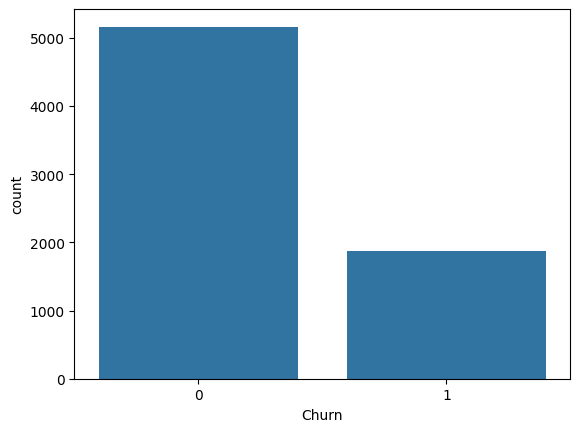

In [ ]:
sns.countplot(x= 'Churn', data = df)

<Axes: >

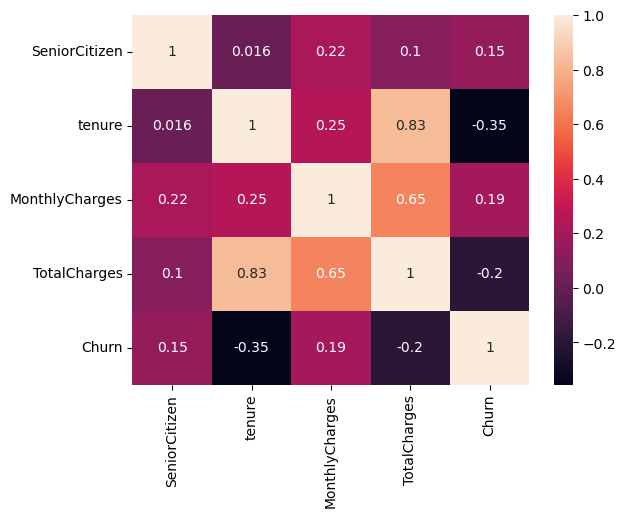

In [ ]:
# Find correlations
corr = df.corr(method='pearson')
sns.heatmap(corr, annot= True)

# 4.Visualize our Data to understand it better

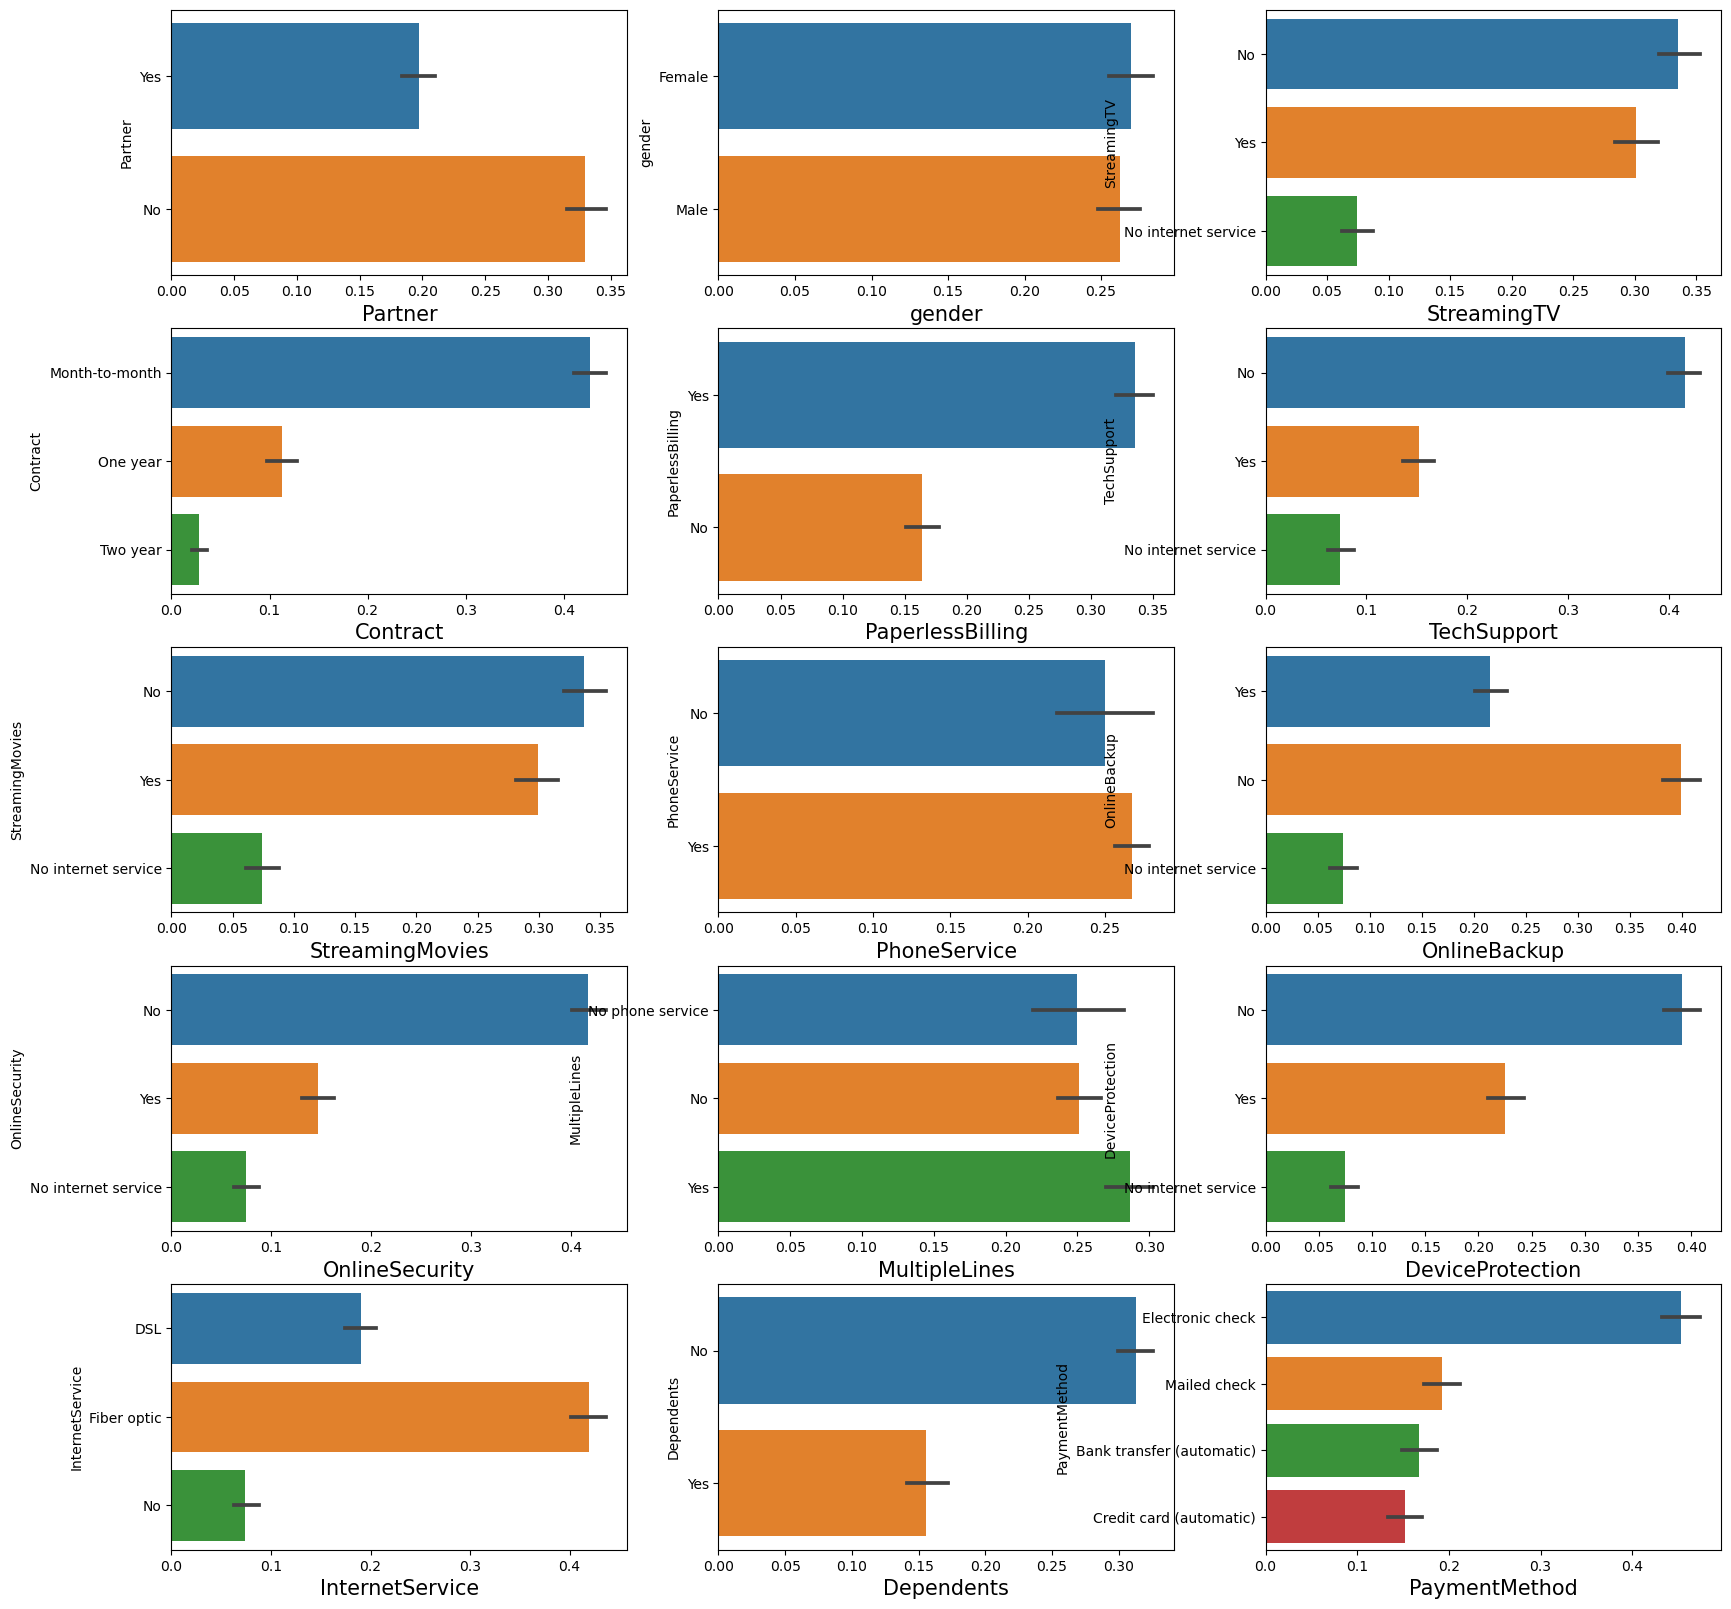

In [ ]:
#Univariate Analysis
plt.figure(figsize=(20,20))

for i,col in enumerate(set(df.select_dtypes(['object']).columns)-{'Churn'}):
     plt.subplot(5,3,i+1)
     sns.barplot(data=df,x='Churn',y=col)
     plt.xlabel(col, fontsize=15)

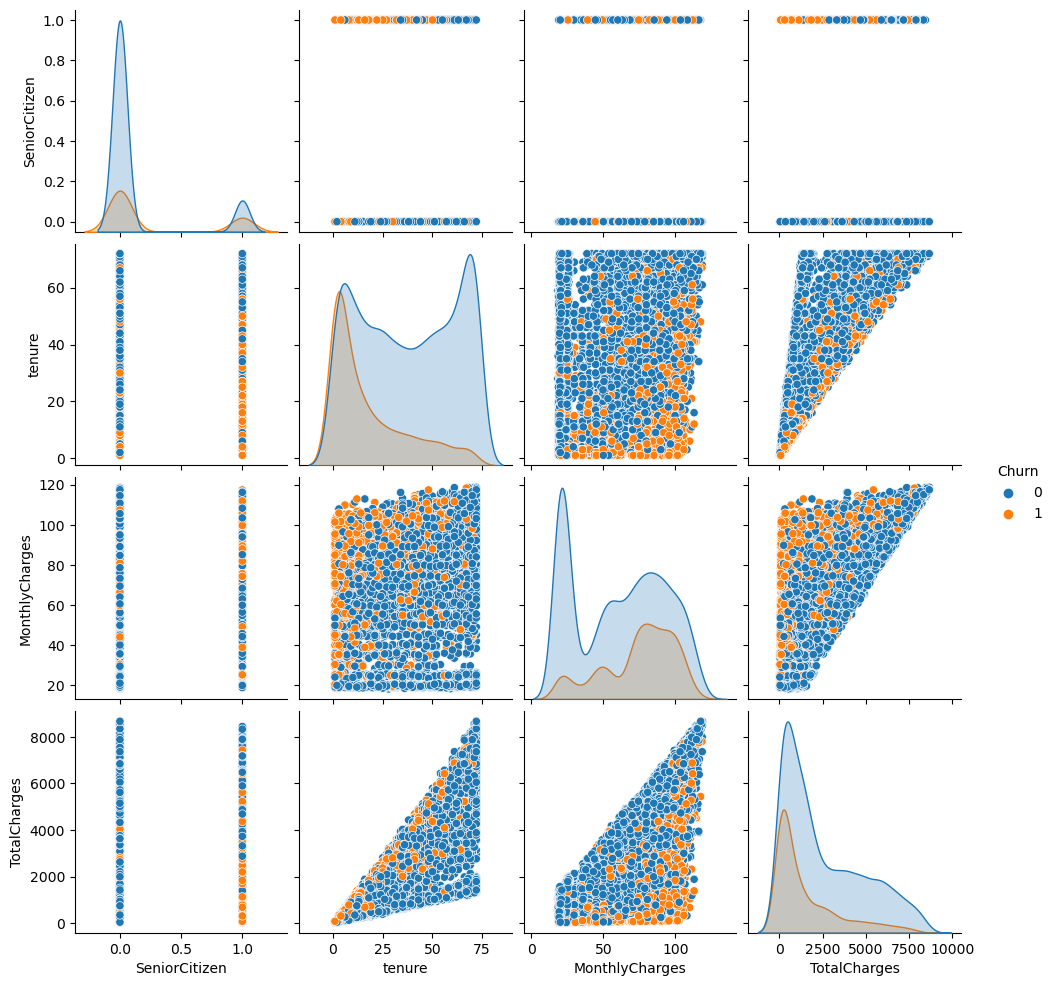

In [ ]:
#Multivariate Analysis
sns.pairplot(data=df, hue='Churn')

In [ ]:
#Encoding the categorical data
X_encoded =  pd.get_dummies(df, columns= ["gender", "Partner", "Dependents", "PhoneService",
      "MultipleLines", "InternetService", "OnlineSecurity",
      "OnlineBackup", "DeviceProtection", "TechSupport",
      "StreamingTV", "StreamingMovies", "Contract",
      "PaperlessBilling", "PaymentMethod"])
X_encoded.head()
X = X_encoded.drop("Churn", axis = 1).copy()
X.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
y = df["Churn"].copy()

# 5.SelectKbest

In [ ]:
# Select best features
select = SelectKBest(k=5)
selected_features = select.fit(X, y)
indexes = selected_features.get_support(indices=True)
col_names_selected = [X.columns[i] for i in indexes]

X_selected = X[col_names_selected]
X_selected.head(10)
X_selected = StandardScaler().fit_transform(X_selected)

In [ ]:
#Split our dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y,
                                                    test_size=0.33, random_state=42, stratify= y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4711, 5) (4711,)
(2321, 5) (2321,)


In [ ]:
#Function to get Classification Report, Confusion Matrix, F1 score and Cross Validation Score


def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}")
        print("_______________________________________________")
        score_w = cross_val_score(clf, X_train, y_train, cv=20)
        print("Weighted Accuracy: %0.2f (+/- %0.2f)\n" % (score_w.mean(), score_w.std() * 2))
        print("-----")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}")
        print("_______________________________________________")
        score_w = cross_val_score(clf, X_train, y_train, cv=20)
        print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

# 6.Classification Models and its evaluvation (Feature selection through Kbest approach)

In [ ]:
#Decision Tree Classification

cross_valid_scores = {}

parameters = {
    "max_depth": [3, 5, 7, 9, 11, 13]
}

model_desicion_tree = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',
)

model_desicion_tree = GridSearchCV(
    model_desicion_tree,
    parameters,
    cv=5,
    scoring='accuracy',
)

model_desicion_tree.fit(X_train, y_train)
model_desicion_tree_predictions = model_desicion_tree.predict(X_test)

print('-----')
print(f'Best parameters {model_desicion_tree.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + \
    f'{model_desicion_tree.best_score_:.3f}'
)
cross_valid_scores['desicion_tree'] = model_desicion_tree.best_score_
print('-----')

print_score(model_desicion_tree, X_train, y_train, X_test, y_test, train=True)
print_score(model_desicion_tree, X_train, y_train, X_test, y_test, train=False)




-----
Best parameters {'max_depth': 5}
Mean cross-validated accuracy score of the best_estimator: 0.754
-----
Train Result:
Accuracy Score: 76.06%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.907945     0.533441   0.76056     0.720693      0.808417
recall        0.749928     0.789936   0.76056     0.769932      0.760560
f1-score      0.821406     0.636832   0.76056     0.729119      0.772353
support    3459.000000  1252.000000   0.76056  4711.000000   4711.000000
_______________________________________________
Confusion Matrix: 
 [[2594  865]
 [ 263  989]]
_______________________________________________
Weighted Accuracy: 0.75 (+/- 0.06)

-----
Test Result:
Accuracy Score: 74.24%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.898990    0.510160  0.742352     0.70

In [ ]:
#KNN Classification
from sklearn import neighbors

knn_cross_valid_scores = {}

parameters = {
    "weights": ["uniform", "distance"],
    "n_neighbors" : [5,10,15,20]
}

model_k_neighbors = neighbors.KNeighborsClassifier(
)

model_k_neighbors = GridSearchCV(
    model_k_neighbors,
    parameters,
    cv=5,
    scoring='accuracy',
)

model_k_neighbors.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_k_neighbors.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' +
    f'{model_k_neighbors.best_score_:.3f}'
)
knn_cross_valid_scores['k_neighbors'] = model_k_neighbors.best_score_
print('-----')


model_k_neighbors_predictions = model_k_neighbors.predict(X_test)

print_score(model_k_neighbors, X_train, y_train, X_test, y_test, train=True)
print_score(model_k_neighbors, X_train, y_train, X_test, y_test, train=False)

-----
Best parameters {'n_neighbors': 10, 'weights': 'uniform'}
Mean cross-validated accuracy score of the best_estimator: 0.792
-----
Train Result:
Accuracy Score: 81.21%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.834982     0.711162  0.812142     0.773072      0.802075
recall        0.927436     0.493610  0.812142     0.710523      0.812142
f1-score      0.878784     0.582744  0.812142     0.730764      0.800108
support    3459.000000  1252.000000  0.812142  4711.000000   4711.000000
_______________________________________________
Confusion Matrix: 
 [[3208  251]
 [ 634  618]]
_______________________________________________
Weighted Accuracy: 0.79 (+/- 0.04)

-----
Test Result:
Accuracy Score: 78.46%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.817511    0.

In [ ]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

parameters = {
    "n_estimators": [20,50,100,200,300,400,500],
    "max_depth": [1,2,3,4,5],
}

model_random_forest = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
)

model_random_forest = GridSearchCV(
    model_random_forest,
    parameters,
    cv=5,
    scoring='accuracy',
)

model_random_forest.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_random_forest.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{model_random_forest.best_score_:.3f}'
)
cross_valid_scores['random_forest'] = model_random_forest.best_score_
print('-----')



model_random_forest_predictions = model_random_forest.predict(X_test)

print_score(model_random_forest, X_train, y_train, X_test, y_test, train=True)
print_score(model_random_forest, X_train, y_train, X_test, y_test, train=False)

-----
Best parameters {'max_depth': 2, 'n_estimators': 100}
Mean cross-validated accuracy score of the best_estimator: 0.729
-----
Train Result:
Accuracy Score: 71.90%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.912003     0.483019  0.718956     0.697511      0.797996
recall        0.683145     0.817891  0.718956     0.750518      0.718956
f1-score      0.781157     0.607355  0.718956     0.694256      0.734967
support    3459.000000  1252.000000  0.718956  4711.000000   4711.000000
_______________________________________________
Confusion Matrix: 
 [[2363 1096]
 [ 228 1024]]
_______________________________________________
Weighted Accuracy: 0.72 (+/- 0.05)

-----
Test Result:
Accuracy Score: 70.87%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.906003    0.4720

In [ ]:
#SVC Classifier

parameters = {

    # comment the below parameters if the model is running longer
   "C": [0.001, 0.01, 0.1, 1.],
   "kernel": ["linear", "poly", "rbf", "sigmoid"],
  "gamma": ["scale", "auto"],
}

model_svc = SVC(
    random_state=42,
    class_weight="balanced",
    probability=True,
)

model_svc = GridSearchCV(
    model_svc,
    parameters,
    cv=5,
    scoring='accuracy',
)

model_svc.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_svc.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' +
    f'{model_svc.best_score_:.3f}'
)
cross_valid_scores['svc'] = model_svc.best_score_
print('-----')


model_svc_predictions = model_svc.predict(X_test)

print_score(model_svc, X_train, y_train, X_test, y_test, train=True)
print_score(model_svc, X_train, y_train, X_test, y_test, train=False)


-----
Best parameters {}
Mean cross-validated accuracy score of the best_estimator: 0.751
-----
Train Result:
Accuracy Score: 75.08%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.904425     0.520679  0.750796     0.712552      0.802440
recall        0.738653     0.784345  0.750796     0.761499      0.750796
f1-score      0.813176     0.625876  0.750796     0.719526      0.763399
support    3459.000000  1252.000000  0.750796  4711.000000   4711.000000
_______________________________________________
Confusion Matrix: 
 [[2555  904]
 [ 270  982]]
_______________________________________________
Weighted Accuracy: 0.75 (+/- 0.05)

-----
Test Result:
Accuracy Score: 73.68%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.896302    0.503185  0.736751     0.699743      0.79

In [ ]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

parameters = {
    "C": [0.001, 0.01, 0.1, 1.],
    "penalty": ["l1", "l2"]
}

model_logistic_regression = LogisticRegression(
    random_state=42,
    class_weight="balanced",
    solver="lbfgs",
    max_iter=1000
)

model_logistic_regression = GridSearchCV(
    model_logistic_regression,
    parameters,
    cv=5,
    scoring='accuracy',
)

model_logistic_regression.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_logistic_regression.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' +
    f'{model_logistic_regression.best_score_:.3f}'
)
cross_valid_scores['logistic_regression'] = model_logistic_regression.best_score_
print('-----')


model_logistic_regression_predictions = model_logistic_regression.predict(X_test)

print_score(model_logistic_regression, X_train, y_train, X_test, y_test, train=True)
print_score(model_logistic_regression, X_train, y_train, X_test, y_test, train=False)

-----
Best parameters {'C': 1.0, 'penalty': 'l2'}
Mean cross-validated accuracy score of the best_estimator: 0.749
-----
Train Result:
Accuracy Score: 74.99%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.904289     0.519577  0.749947     0.711933      0.802048
recall        0.737496     0.784345  0.749947     0.760921      0.749947
f1-score      0.812420     0.625080  0.749947     0.718750      0.762633
support    3459.000000  1252.000000  0.749947  4711.000000   4711.000000
_______________________________________________
Confusion Matrix: 
 [[2551  908]
 [ 270  982]]
_______________________________________________
Weighted Accuracy: 0.75 (+/- 0.06)

-----
Test Result:
Accuracy Score: 74.06%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.903367    0.507853  0.7406

# 7. Feature Selection through PCA

In [ ]:
X = StandardScaler().fit_transform(X)
sklearn_pca = PCA(n_components=5)
X_pca_10 = sklearn_pca.fit_transform(X)
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.25212342 0.1351744  0.09429399 0.0564841  0.05005279]


In [ ]:
#Split our dataset into train and test datasets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_10, y,
                                                    test_size=0.33, random_state=42, stratify= y)
print(X_train_pca.shape, y_train_pca.shape)
print(X_test_pca.shape, y_test_pca.shape)

(4711, 5) (4711,)
(2321, 5) (2321,)


# 8.Classification Models and its evaluvation (Feature selection through PCA approach)

In [ ]:
#Decision Tree Classification

cross_valid_scores_pca = {}

parameters = {
    "max_depth": [3, 5, 7, 9, 11, 13]
}

model_desicion_tree_pca = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',
)

model_desicion_tree_pca = GridSearchCV(
    model_desicion_tree_pca,
    parameters,
    cv=5,
    scoring='accuracy',
)

model_desicion_tree_pca.fit(X_train_pca, y_train_pca)
model_desicion_tree_predictions_pca = model_desicion_tree_pca.predict(X_test_pca)

print('-----')
print(f'Best parameters {model_desicion_tree_pca.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + \
    f'{model_desicion_tree_pca.best_score_:.3f}'
)
cross_valid_scores_pca['desicion_tree'] = model_desicion_tree_pca.best_score_
print('-----')

print_score(model_desicion_tree_pca, X_train_pca, y_train_pca, X_test_pca, y_test_pca, train=True)
print_score(model_desicion_tree_pca, X_train_pca, y_train_pca, X_test_pca, y_test_pca, train=False)

-----
Best parameters {'max_depth': 7}
Mean cross-validated accuracy score of the best_estimator: 0.730
-----
Train Result:
Accuracy Score: 80.22%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.918794     0.594451  0.802165     0.756622      0.832596
recall        0.801388     0.804313  0.802165     0.802850      0.802165
f1-score      0.856084     0.683639  0.802165     0.769861      0.810255
support    3459.000000  1252.000000  0.802165  4711.000000   4711.000000
_______________________________________________
Confusion Matrix: 
 [[2772  687]
 [ 245 1007]]
_______________________________________________
Weighted Accuracy: 0.72 (+/- 0.07)

-----
Test Result:
Accuracy Score: 73.46%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.882022    0.500557  0.734597     0.69

In [ ]:
#KNN Classification
from sklearn import neighbors

knn_cross_valid_scores_pca = {}

parameters = {
    "weights": ["uniform", "distance"],
    "n_neighbors" : [5,10,15,20]
}

model_k_neighbors_pca = neighbors.KNeighborsClassifier(
)

model_k_neighbors_pca = GridSearchCV(
    model_k_neighbors_pca,
    parameters,
    cv=5,
    scoring='accuracy',
)

model_k_neighbors_pca.fit(X_train_pca, y_train_pca)

print('-----')
print(f'Best parameters {model_k_neighbors_pca.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' +
    f'{model_k_neighbors_pca.best_score_:.3f}'
)
knn_cross_valid_scores_pca['k_neighbors'] = model_k_neighbors_pca.best_score_
print('-----')


model_k_neighbors_predictions_pca = model_k_neighbors_pca.predict(X_test_pca)

print_score(model_k_neighbors_pca, X_train_pca, y_train_pca, X_test_pca, y_test_pca, train=True)
print_score(model_k_neighbors_pca, X_train_pca, y_train_pca, X_test_pca, y_test_pca, train=False)

-----
Best parameters {'n_neighbors': 15, 'weights': 'uniform'}
Mean cross-validated accuracy score of the best_estimator: 0.786
-----
Train Result:
Accuracy Score: 81.09%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.842400     0.687825  0.810868     0.765113      0.801320
recall        0.913270     0.527955  0.810868     0.720613      0.810868
f1-score      0.876404     0.597379  0.810868     0.736892      0.802250
support    3459.000000  1252.000000  0.810868  4711.000000   4711.000000
_______________________________________________
Confusion Matrix: 
 [[3159  300]
 [ 591  661]]
_______________________________________________
Weighted Accuracy: 0.79 (+/- 0.05)

-----
Test Result:
Accuracy Score: 78.03%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.829107    0.

In [ ]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

random_cross_valid_scores_pca = {}

parameters = {
    "n_estimators": [20,50,100,200,300,400,500],
    "max_depth": [1,2,3,4,5],
}

model_random_forest_pca = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
)

model_random_forest_pca = GridSearchCV(
    model_random_forest_pca,
    parameters,
    cv=5,
    scoring='accuracy',
)

model_random_forest_pca.fit(X_train_pca, y_train_pca)

print('-----')
print(f'Best parameters {model_random_forest_pca.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{model_random_forest_pca.best_score_:.3f}'
)
random_cross_valid_scores_pca['random_forest'] = model_random_forest_pca.best_score_
print('-----')



model_random_forest_predictions_pca = model_random_forest_pca.predict(X_test_pca)

print_score(model_random_forest_pca, X_train_pca, y_train_pca, X_test_pca, y_test_pca, train=True)
print_score(model_random_forest_pca, X_train_pca, y_train_pca, X_test_pca, y_test_pca, train=False)

-----
Best parameters {'max_depth': 2, 'n_estimators': 100}
Mean cross-validated accuracy score of the best_estimator: 0.729
-----
Train Result:
Accuracy Score: 72.64%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.900961     0.490773  0.726385     0.695867      0.791949
recall        0.704828     0.785942  0.726385     0.745385      0.726385
f1-score      0.790916     0.604237  0.726385     0.697577      0.741304
support    3459.000000  1252.000000  0.726385  4711.000000   4711.000000
_______________________________________________
Confusion Matrix: 
 [[2438 1021]
 [ 268  984]]
_______________________________________________
Weighted Accuracy: 0.72 (+/- 0.07)

-----
Test Result:
Accuracy Score: 71.18%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.896552    0.4744

In [ ]:
#SVC Classifier

svc_cross_valid_scores_pca ={}
parameters = {

    # comment the below parameter if the model is running longer
    "C": [0.001, 0.01, 0.1, 1.],
   "kernel": ["linear", "poly", "rbf", "sigmoid"],
   "gamma": ["scale", "auto"],
}

model_svc_pca = SVC(
    random_state=42,
    class_weight="balanced",
    probability=True,
)

model_svc_pca = GridSearchCV(
    model_svc_pca,
    parameters,
    cv=5,
    scoring='accuracy',
)

model_svc_pca.fit(X_train_pca, y_train_pca)

print('-----')
print(f'Best parameters {model_svc_pca.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' +
    f'{model_svc_pca.best_score_:.3f}'
)
svc_cross_valid_scores_pca['svc'] = model_svc_pca.best_score_
print('-----')


model_svc_predictions_pca = model_svc_pca.predict(X_test_pca)

print_score(model_svc_pca, X_train_pca, y_train_pca, X_test_pca, y_test_pca, train=True)
print_score(model_svc_pca, X_train_pca, y_train_pca, X_test_pca, y_test_pca, train=False)

-----
Best parameters {}
Mean cross-validated accuracy score of the best_estimator: 0.738
-----
Train Result:
Accuracy Score: 73.98%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.910026     0.506539  0.739758     0.708282      0.802795
recall        0.716392     0.804313  0.739758     0.760353      0.739758
f1-score      0.801682     0.621605  0.739758     0.711644      0.753825
support    3459.000000  1252.000000  0.739758  4711.000000   4711.000000
_______________________________________________
Confusion Matrix: 
 [[2478  981]
 [ 245 1007]]
_______________________________________________
Weighted Accuracy: 0.74 (+/- 0.06)

-----
Test Result:
Accuracy Score: 71.74%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.906832    0.481123  0.717363     0.693978      0.79

In [ ]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

lr_cross_valid_scores_pca ={}

parameters = {
    "C": [0.001, 0.01, 0.1, 1.],
    "penalty": ["l1", "l2"]
}

model_logistic_regression_pca = LogisticRegression(
    random_state=42,
    class_weight="balanced",
    solver="lbfgs",
    max_iter=1000
)

model_logistic_regression_pca = GridSearchCV(
    model_logistic_regression_pca,
    parameters,
    cv=5,
    scoring='accuracy',
)

model_logistic_regression_pca.fit(X_train_pca, y_train_pca)

print('-----')
print(f'Best parameters {model_logistic_regression_pca.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' +
    f'{model_logistic_regression_pca.best_score_:.3f}'
)
lr_cross_valid_scores_pca['logistic_regression'] = model_logistic_regression_pca.best_score_
print('-----')


model_logistic_regression_predictions_pca = model_logistic_regression_pca.predict(X_test_pca)

print_score(model_logistic_regression_pca, X_train_pca, y_train_pca, X_test_pca, y_test_pca, train=True)
print_score(model_logistic_regression_pca, X_train_pca, y_train_pca, X_test_pca, y_test_pca, train=False)

-----
Best parameters {'C': 1.0, 'penalty': 'l2'}
Mean cross-validated accuracy score of the best_estimator: 0.746
-----
Train Result:
Accuracy Score: 74.85%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.904339     0.517641  0.748461     0.710990      0.801569
recall        0.735184     0.785144  0.748461     0.760164      0.748461
f1-score      0.811035     0.623929  0.748461     0.717482      0.761309
support    3459.000000  1252.000000  0.748461  4711.000000   4711.000000
_______________________________________________
Confusion Matrix: 
 [[2543  916]
 [ 269  983]]
_______________________________________________
Weighted Accuracy: 0.75 (+/- 0.06)

-----
Test Result:
Accuracy Score: 72.43%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.898801    0.488349  0.7242

# 9.Comparing the Predictions

In [ ]:
predictions_dictionary = {'Actual': y_test,'Logistic Regression_Kbest' : model_logistic_regression_predictions,
                          'KNN_5_Kbest' : model_k_neighbors_predictions,
                          'SVC_Kbest' : model_svc_predictions, 'Decision Tree_Kbest' : model_desicion_tree_predictions ,
                          'Random Forest_Kbest' : model_random_forest_predictions,
                         'Logistic Regression_PCA' : model_logistic_regression_predictions_pca,
                          'KNN_5_PCA' : model_k_neighbors_predictions_pca,
                          'SVC_PCA' : model_svc_predictions_pca, 'Decision Tree_PCA' : model_desicion_tree_predictions_pca,
                          'Random Forest_PCA' : model_random_forest_predictions_pca}

predictions_df = pd.DataFrame(predictions_dictionary)
predictions_df

,Actual,Logistic Regression_Kbest,KNN_5_Kbest,SVC_Kbest,Decision Tree_Kbest,Random Forest_Kbest,Logistic Regression_PCA,KNN_5_PCA,SVC_PCA,Decision Tree_PCA,Random Forest_PCA
177,1,1,0,1,1,1,1,0,1,0,1
4638,1,1,1,1,1,1,1,1,1,1,1
5691,0,0,0,0,0,0,0,0,0,0,0
3291,0,0,0,0,0,0,0,0,0,0,0
2766,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2907,1,1,1,1,1,1,1,1,1,1,1
3007,1,1,0,1,1,1,1,1,1,1,1
2304,0,0,0,0,0,0,0,0,0,0,0
4343,1,1,1,1,1,1,1,1,1,1,1


# 10. Conclusions

In [ ]:
As part of this exercise, we have run the Logistic Regression, KNN, SVC, Decision Tree, Random Forest models based
on two features selection methods, Kbest and PCA.

The KNN model based on Kbest feature selection model performed very well compared to others.

Accuracy Score on test set - 78%
Accuracy Score on train set - 81%
Best parameters {'n_neighbors': 15, 'weights': 'uniform'}
Mean cross-validated accuracy score of the best_estimator: 0.795

CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.832869    0.602662  0.780698     0.717765      0.771672
recall        0.877347    0.513776  0.780698     0.695562      0.780698
f1-score      0.854530    0.554681  0.780698     0.704605      0.774820
support    1704.000000  617.000000  0.780698  2321.000000   2321.000000
_______________________________________________
Confusion Matrix:
 [[1495  209]
 [ 300  317]]
